In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 16)
pd.set_option('precision', 2)

import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')

In [312]:
train_data = pd.read_csv('/home/rpsingh/Desktop/Titanic Survival Prediction/train.csv')
test_data = pd.read_csv('/home/rpsingh/Desktop/Titanic Survival Prediction/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [313]:
test_data.head()  #sample of test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [314]:
train_data.describe()  #data description

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [315]:
train_data.describe(include = 'all') #data also Contain NaN values we have to convert it into numeric data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Daniel, Mr. Robert Williams",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [316]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [317]:
pd.isnull(train_data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

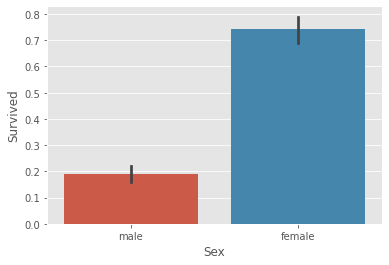

In [318]:
import seaborn as sbn
sbn.barplot(x="Sex", y="Survived", data =train_data)
#it will tell us, % of sex who get survived

In [319]:
print('female survives', train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1], end = '\n')
print('male survives', train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize = True)[1])

female survives 0.7420382165605095
male survives 0.18890814558058924


In [320]:
# Percentage of female Survives = 74%
# Percentage of male Survives = 19%

1st Class :  0.6296296296296297
2nd Class :  0.47282608695652173
3rd Class :  0.24236252545824846


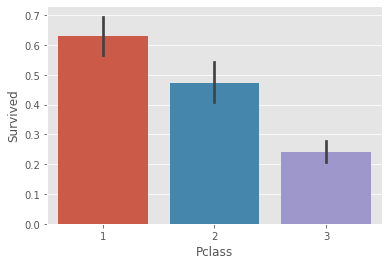

In [321]:
sbn.barplot(x="Pclass", y="Survived", data=train_data)
print('1st Class : ',train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1])
print('2nd Class : ',train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1])
print('3rd Class : ',train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

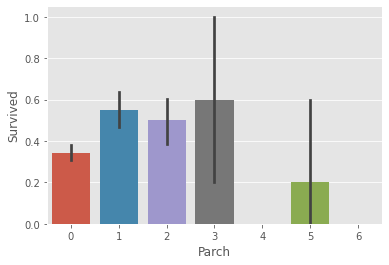

In [322]:
sbn.barplot(x="Parch", y="Survived", data=train_data)

In [323]:
train_data["Age"] = train_data["Age"].fillna(train_data['Age'].mean())
test_data['Age'] = test_data["Age"].fillna(test_data['Age'].mean())

In [324]:
bins =   [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

In [325]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'], dtype='object')

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

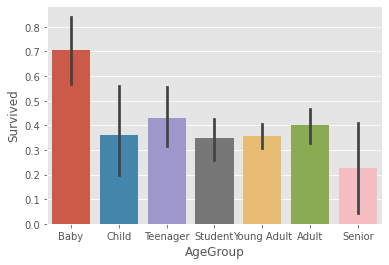

In [326]:
sbn.barplot(x="AgeGroup", y="Survived", data=train_data)

In [327]:
pd.isnull(train_data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

In [328]:
#now we have a handle the data of Cabin and Embarked

In [329]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

In [330]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [331]:
#drop the name feature since it contains no more useful information.
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [332]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,7.25,S,Student
1,2,1,1,female,38.0,1,0,71.28,C,Adult
2,3,1,3,female,26.0,0,0,7.92,S,Young Adult
3,4,1,1,female,35.0,1,0,53.10,S,Young Adult
4,5,0,3,male,35.0,0,0,8.05,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.00,S,Young Adult
887,888,1,1,female,19.0,0,0,30.00,S,Student
888,889,0,3,female,29.7,1,2,23.45,S,Young Adult
889,890,1,1,male,26.0,0,0,30.00,C,Young Adult


In [333]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [334]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

In [335]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,0,22.0,1,0,7.25,1.0,Student
1,2,1,1,1,38.0,1,0,71.28,2.0,Adult
2,3,1,3,1,26.0,0,0,7.92,1.0,Young Adult
3,4,1,1,1,35.0,1,0,53.10,1.0,Young Adult
4,5,0,3,0,35.0,0,0,8.05,1.0,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.00,1.0,Young Adult
887,888,1,1,1,19.0,0,0,30.00,1.0,Student
888,889,0,3,1,29.7,1,2,23.45,1.0,Young Adult
889,890,1,1,0,26.0,0,0,30.00,2.0,Young Adult


In [336]:
pd.isnull(test_data).sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeGroup       0
dtype: int64

In [337]:
test_data['Fare'].fillna(test_data["Fare"].mean())
train_data = train_data.drop(['AgeGroup'], axis =1)
test_data = test_data.drop(['AgeGroup'], axis =1)

#there id also no need of passenger id, So we can also delete that column also
train_data = train_data.drop(['PassengerId'], axis =1)
test_data = test_data.drop(['PassengerId'], axis = 1)
train_data
train_data = train_data.drop(['Embarked'], axis = 1)
test_data = test_data.drop(['Embarked'], axis=1)

In [338]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.25
1,1,1,1,38.0,1,0,71.28
2,1,3,1,26.0,0,0,7.92
3,1,1,1,35.0,1,0,53.10
4,0,3,0,35.0,0,0,8.05
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.00
887,1,1,1,19.0,0,0,30.00
888,0,3,1,29.7,1,2,23.45
889,1,1,0,26.0,0,0,30.00


In [339]:
# Applying Decision Tree Classifier

In [340]:
from sklearn.model_selection import train_test_split
x_data = train_data.drop(['Survived'], axis = 1)
y_data = train_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [341]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7821229050279329

In [ ]:
#this model predict output with 78.2% accuracy